# Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Why Pandas?
SQL에서 배운 관계형 데이터베이스를 다루는 방법인 realtional algebra,   
편리했던 SQL에서의 경험을 판다스를 이용해서 또 데이터를 집어넣고 하면 편할것 같아서 만든겁니다.  

In [2]:
#Limitation of Numpy Object
#Content Base로 데이터에 접근한다.
a=np.array([[1,2,3],[4,5,6]],float)
a[1,:]

array([ 4.,  5.,  6.])

In [3]:
a[:,2]

array([ 3.,  6.])

In [4]:
a[-1:,-2:]

array([[ 5.,  6.]])

Table 두개의 Join을 하려면 어떻게 해야하나..? Numpy에서 하려면요.   
이게 어려워요. 그래서 SQL에서 아예 가져오려고 하거나 합니다.  
판다스의 Motivation이 이것입니다. 파이썬에서 데이터를 직접 다루고 싶어서입니다.  
  
-Pandas 에서 제공하는 Data Type  
data series가 1차원데이터  
data frame이 2차원 테이블입니다   
Panel은 3~5차원입니다.  
data base table과 같아요.   

##  Pandas Series Object
1차원 pandas data type  
인덱스 기반으로 되어있는것이 Pandas Series Object입니다

In [5]:
s=pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
#이런식으로도 가능합니다.
np_s=np.array([1,3,5,np.nan,6,8])
pd_s=pd.Series(np_s)
pd_s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Pandas는 오토매틱 Indexing을 지원합니다  
왜 이게있을까요? 당연히! 옆에다가 인덱스 정보를 걸어놓아서   
데이터 가져오기 편하게 하기위해서입니다.

In [7]:
d={'a':0.,'b':1.,'c':2.} #실수표현
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [8]:
from pandas import Series, DataFrame
import pandas as pd
sdata={'Ohio':35000,'Texas':71000,'Oregon':16000,'Utah':5000}
obj3=Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [9]:
states=['California','Ohio','Oregon','Texas']
obj4=Series(sdata,index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

시리즈 데이터로 표현할 적에 Utah는 아예 나타나지 않고,       
캘리포니아는 값이 없었으므로, NaN처리 해서 나타냅니다.     
Dictionary의 키값이 Unique하므로 인덱스로 써서 만들어주면
  키 역할을 할수있습니다.  

In [10]:
pd.isnull(obj4) #obj4.isnull()과 같은결과

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [11]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [12]:
pd.notnull(obj4)#obj4.notnull()과 같은결과

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [13]:
obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

## Pandas DataFrame Object

In [14]:
sales_states={'Day':[1,2,3,4,5,6],
              'Visitors':[43,45,33,43,78,44],
              'Revenues':[64,73,62,64,53,66]}
df=pd.DataFrame(sales_states)
df

,Day,Revenues,Visitors
0,1,64,43
1,2,73,45
2,3,62,33
3,4,64,43
4,5,53,78
5,6,66,44


생성된 Index들은 Label이라고도 불리지만, 주로 index로 불립니다.  
  
2차원 리스트가 들어갈수도있고, 혹은 딕셔너리가 들어갈수도 있습니다.  
Day,Visitors, Revenues는 Column이라고 불립니다.  
df[col]: select column  
df.loc[label] : select row by label  
df.iloc[loc]: select row by integer location  
df[5:10]: slice rows  
df[bool_vec] : Select rows by boolean vector  

In [15]:
df.loc[0]

Day          1
Revenues    64
Visitors    43
Name: 0, dtype: int64

In [16]:
df.loc[:3] #Pandas는 마지막 3도 포함합니다.

,Day,Revenues,Visitors
0,1,64,43
1,2,73,45
2,3,62,33
3,4,64,43


In [17]:
df=df.set_index('Day') #인덱스를 Day로 교체해줬습니다. 유니크하니까 상관없지용!
df

,Revenues,Visitors
Day,,
1,64,43
2,73,45
3,62,33
4,64,43
5,53,78
6,66,44


In [18]:
df.iloc[1]#자동으로 매겨놓은 index기반입니다.(0,1,2,3에서의 입니다.)

Revenues    73
Visitors    45
Name: 2, dtype: int64

In [19]:
df.loc[1] #Index기반입니다. 인덱스에 들어있는 값을 기반으로 해서 찾아줍니다. Day가 1인걸 찾아줍니다.

Revenues    64
Visitors    43
Name: 1, dtype: int64

In [20]:
sales_stats={'Visitors':[43,45,33,43,78,44],
             'Revenue':[64,73,62,64,53,66]}

In [21]:
df2=pd.DataFrame(sales_stats,index=['a','b','c','d','e','f'])
df2

,Revenue,Visitors
a,64,43
b,73,45
c,62,33
d,64,43
e,53,78
f,66,44


In [22]:
df2.loc['f']
df2.loc['c':'e']

,Revenue,Visitors
c,62,33
d,64,43
e,53,78


In [23]:
df2.iloc[3:5]

,Revenue,Visitors
d,64,43
e,53,78


나는 revenue가 65초과인 행만 원해!  
SQl에서 Where절에 조건 추가하는 것처럼 합니다.

In [24]:
df2[df2['Revenue']>65]

,Revenue,Visitors
b,73,45
f,66,44


In [25]:
df2[(df2['Revenue']>65)|(df2['Visitors']>70)]

,Revenue,Visitors
b,73,45
e,53,78
f,66,44


In [26]:
df2['Visitors'] #Visitor만 튀어나오는게 아니라 Index도 같이 튀어나옵니다.

a    43
b    45
c    33
d    43
e    78
f    44
Name: Visitors, dtype: int64

In [27]:
df2[['Visitors','Revenue']]

,Visitors,Revenue
a,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66


In [28]:
DataFrame(df2,columns=['Visitors','Revenue'])#순서 교체가능

,Visitors,Revenue
a,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66


In [29]:
DataFrame(df2,columns=['Revenue','Visitors'])

,Revenue,Visitors
a,64,43
b,73,45
c,62,33
d,64,43
e,53,78
f,66,44


In [30]:
#새로운 컬럼 추가하기
df3=DataFrame(df2,columns=['Visitors','Revenue','Debt'])
df3

,Visitors,Revenue,Debt
a,43,64,NaN
b,45,73,NaN
c,33,62,NaN
d,43,64,NaN
e,78,53,NaN
f,44,66,NaN


In [31]:
del df3['Debt'] 
#df3.drop('Debt',axis=1) #각 Row에 입니다. 
#날릴수있어요 del이 전부다 날릴수가있어요 한 컬럼도 날릴수 있습니다.
df3

,Visitors,Revenue
a,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66


In [32]:
#Add a New Row
df3.loc['h']=[200,77]
df3

,Visitors,Revenue
a,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66
h,200,77


In [33]:
#Delete an existing row
df3
df3.drop('h',axis=0)#각 column에 대해서 입니다.

,Visitors,Revenue
a,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66


In [34]:
df=DataFrame([[1,2,3],[4,5,6],[7,8,9]])
newcols1={0:'A',1:'B',2:'C'}
df=df.rename(columns=newcols1)

In [35]:
#Rename Row/Column in DataFrame Object
Change_dict={'old_name1':'new_name1','old_name2':'new_name2'}

In [36]:
newcols={'A':'new_col_1','B':'new_col_2','C':'new_col_3'}
df.rename(columns=newcols)

,new_col_1,new_col_2,new_col_3
0,1,2,3
1,4,5,6
2,7,8,9


In [37]:
df.rename(index={1:'a'})

,A,B,C
0,1,2,3
a,4,5,6
2,7,8,9


In [38]:
df2[df2['Revenue']>65].count()

Revenue     2
Visitors    2
dtype: int64

In [39]:
df2['Revenue'].mean

<bound method Series.mean of a    64
b    73
c    62
d    64
e    53
f    66
Name: Revenue, dtype: int64>

In [40]:
df2.cov()

,Revenue,Visitors
Revenue,41.866667,-67.133333
Visitors,-67.133333,239.866667


In [41]:
#iterrow()
df=pd.DataFrame(data=np.array([[1,2,3],[4,5,6],[7,8,9]]),columns=['A','B','C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [42]:
for index,row in df.iterrows():
    print(row['A'],row['B'])

1 2
4 5
7 8


In [43]:
df=pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                'B':['one','one','two','three','two','two','one','three'],'C':np.random.randn(8), 'D':np.random.randn(8)})

In [44]:
df# Group 묶고싶어요 A는 foo는 foo끼리 Bar는 bar끼리! B는 one과 two three로!

,A,B,C,D
0,foo,one,0.236596,-0.193496
1,bar,one,1.782617,1.273818
2,foo,two,0.440043,1.696078
3,bar,three,-0.204020,0.182040
4,foo,two,0.974248,-0.861339
5,bar,two,0.217178,1.328268
6,foo,one,0.097234,-0.192539
7,foo,three,-2.590687,-0.591913


In [45]:
grouped=df.groupby('A') #A컬럼가지고 그룹핑을 합니다.
grouped

In [46]:
grouped.mean()

,C,D
A,,
bar,0.598591,0.928042
foo,-0.168513,-0.028642


In [47]:
grouped.sum()

,C,D
A,,
bar,1.795774,2.784126
foo,-0.842566,-0.143210


In [48]:
#동시에 두개 그루핑
grouped2=df.groupby(['A','B'])

In [49]:
grouped2.mean()

C         D
A   B                        
bar one    1.782617  1.273818
    three -0.204020  0.182040
    two    0.217178  1.328268
foo one    0.166915 -0.193017
    three -2.590687 -0.591913
    two    0.707145  0.417369

In [50]:
grouped.get_group('bar')

,B,C,D
1,one,1.782617,1.273818
3,three,-0.204020,0.182040
5,two,0.217178,1.328268


__관계형 데이터베이스 테이블 조인과같은게 하고싶다__  
result=pd.merge(left,right,on='key')

## Pandas Panel Object

In [51]:
import numpy as np
import pandas as pd
data=np.random.rand(2,4,3)
p=pd.Panel(data)

In [52]:
print(p)
print(p.values)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: 0 to 1
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2
[[[ 0.44712358  0.36801454  0.0541588 ]
  [ 0.77997817  0.16033062  0.46435048]
  [ 0.1702793   0.69933766  0.76158786]
  [ 0.17319946  0.31333728  0.30256222]]

 [[ 0.23895264  0.62258053  0.42888448]
  [ 0.57223916  0.63356333  0.81564683]
  [ 0.34632165  0.03422882  0.56408184]
  [ 0.1522958   0.22972675  0.05288461]]]


In [53]:
data={'Item1': pd.DataFrame(np.random.randn(4,3)),'Item2':pd.DataFrame(np.random.randn(4,2))}
p=pd.Panel( data )
print(p)
print(p.values)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2
[[[-1.30271169  1.24493105 -0.85780048]
  [-0.05877234  0.60935157 -0.97963659]
  [-0.34499707 -0.01095605 -0.40330858]
  [ 0.30651174 -1.22586724 -0.64423693]]

 [[-0.00738691  0.96656821         nan]
  [-1.48404314 -1.38218632         nan]
  [ 1.4646765   1.6860748          nan]
  [-1.23849711 -0.16632915         nan]]]


In [54]:
data={'Item1':pd.DataFrame([[0,0,0],[1,1,1],[2,2,2]]),
     'Item2':pd.DataFrame([[1,2,3,4],[5,6,7,8]])}

In [55]:
p=pd.Panel(data)

In [56]:
print("Using Item Axis")
print(p['Item1'])
print("Using Major axis")
print(p.major_xs(1))#1번째 row 
print("Using Minor axis")
print(p.minor_xs(1))#1번째 columns

Using Item Axis
     0    1    2   3
0  0.0  0.0  0.0 NaN
1  1.0  1.0  1.0 NaN
2  2.0  2.0  2.0 NaN
Using Major axis
   Item1  Item2
0    1.0    5.0
1    1.0    6.0
2    1.0    7.0
3    NaN    8.0
Using Minor axis
   Item1  Item2
0    0.0    2.0
1    1.0    6.0
2    2.0    NaN


In [57]:
data={'Item1':pd.DataFrame([[0,0,0],[1,1,1],[2,2,2]]),
     'Item2':pd.DataFrame([[1,2,3,4],[5,6,7,8]])}

In [67]:
p=pd.Panel(data)
print(p)
print(p.values)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 3 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 2
Minor_axis axis: 0 to 3
[[[  0.   0.   0.  nan]
  [  1.   1.   1.  nan]
  [  2.   2.   2.  nan]]

 [[  1.   2.   3.   4.]
  [  5.   6.   7.   8.]
  [ nan  nan  nan  nan]]]


In [68]:
#No Transpose!!!
print(p.transpose(0,1,2))
print(p.transpose(0,1,2).values)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 3 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 2
Minor_axis axis: 0 to 3
[[[  0.   0.   0.  nan]
  [  1.   1.   1.  nan]
  [  2.   2.   2.  nan]]

 [[  1.   2.   3.   4.]
  [  5.   6.   7.   8.]
  [ nan  nan  nan  nan]]]


In [69]:
#Transpose!!!
print(p.transpose(0,2,1))
print(p.transpose(0,2,1).values)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2
[[[  0.   1.   2.]
  [  0.   1.   2.]
  [  0.   1.   2.]
  [ nan  nan  nan]]

 [[  1.   5.  nan]
  [  2.   6.  nan]
  [  3.   7.  nan]
  [  4.   8.  nan]]]


In [70]:
p=pd.Panel(np.random.randn(3,5,4),items=['one','two','three'],
          major_axis=pd.date_range('1/1/2000',periods=5),
          minor_axis=['a','b','c','d'])
print("#### Panel ####")
print(p)
print(p.values)

df=p.to_frame()
print("\n#### DataFrame ####")
print(df)
print(df.values)

#### Panel ####
<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: one to three
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: a to d
[[[ -7.79788869e-01   3.87489467e-02   2.01294732e-02   2.55290294e+00]
  [ -2.65961790e-01  -1.14419513e+00  -1.62074198e-02  -1.41383882e-01]
  [  5.98393798e-01  -1.26473044e-02  -4.47646111e-01   6.86214959e-01]
  [  1.67836546e+00   1.58865191e+00   7.75830273e-01   2.27038827e-01]
  [  1.46068808e+00  -7.70089039e-01  -9.54452066e-01   2.23418874e+00]]

 [[ -1.82101854e+00  -2.09767545e+00  -1.98041768e+00   2.02252218e-02]
  [ -1.12396936e+00   1.02417930e-03   3.77048635e-01  -7.66119521e-01]
  [ -7.43830802e-01   8.84156196e-01   1.55489113e+00   4.29241684e-01]
  [  5.34302644e-01   8.41925564e-01   2.46900761e-01  -9.31685677e-01]
  [  4.01859612e-01   1.55742436e-01  -5.98809111e-01   4.27204139e-01]]

 [[  1.09717345e+00   3.99670680e-02  -1.30112217e+00   4.552

## Time Series Data in Pandas
편하게 잘 다룰수있습니다 판다스에서요.

In [71]:
pd.DatetimeIndex(['2018-01-01','2018-01-04','2018-01-05','2018-01-06'],dtype='datetime64[ns]',freq=None)

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [72]:
#연,월,일,시,분,초,마이크로초
pd.datetime(2017,6,29,16,26,49,626987)

datetime.datetime(2017, 6, 29, 16, 26, 49, 626987)

In [73]:
import datetime
datetime.datetime(2017,6,29,15,26,49,626987)

datetime.datetime(2017, 6, 29, 15, 26, 49, 626987)

In [74]:
from datetime import datetime
today=datetime.today()
print(today)
today

2018-08-09 11:47:41.714213


datetime.datetime(2018, 8, 9, 11, 47, 41, 714213)

In [76]:
date_str=["2018, 1, 1", "2018, 1, 4" ,"2018, 1, 5","2018, 1, 6"]
idx=pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [77]:
pd.date_range("2018-4-1","2018-4-30")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [78]:
#2018-04-01부터 30일!
pd.date_range("2018-4-1",periods=30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [79]:
pd.date_range("2018-4-1","2018-4-30",freq="B") #주말이 아닌 평일

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='B')

In [80]:
pd.date_range("2018-1-1","2018-12-31",freq="W") #주(일요일)

DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25',
               '2018-03-04', '2018-03-11', '2018-03-18', '2018-03-25',
               '2018-04-01', '2018-04-08', '2018-04-15', '2018-04-22',
               '2018-04-29', '2018-05-06', '2018-05-13', '2018-05-20',
               '2018-05-27', '2018-06-03', '2018-06-10', '2018-06-17',
               '2018-06-24', '2018-07-01', '2018-07-08', '2018-07-15',
               '2018-07-22', '2018-07-29', '2018-08-05', '2018-08-12',
               '2018-08-19', '2018-08-26', '2018-09-02', '2018-09-09',
               '2018-09-16', '2018-09-23', '2018-09-30', '2018-10-07',
               '2018-10-14', '2018-10-21', '2018-10-28', '2018-11-04',
               '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
               '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30'],
              dtype='datetime64[ns]', freq='W-SUN')

In [81]:
#타임스탬프주고 5일동안!
pd.date_range(start='9/28/2016 16:00',periods=5)

DatetimeIndex(['2016-09-28 16:00:00', '2016-09-29 16:00:00',
               '2016-09-30 16:00:00', '2016-10-01 16:00:00',
               '2016-10-02 16:00:00'],
              dtype='datetime64[ns]', freq='D')

In [82]:
#2달마다 주말이 아닌 평일 중에서 각달의 첫날
pd.date_range(start='1/1/2016',end='1/1/2017',freq="2BMS")

DatetimeIndex(['2016-01-01', '2016-03-01', '2016-05-02', '2016-07-01',
               '2016-09-01', '2016-11-01'],
              dtype='datetime64[ns]', freq='2BMS')

In [83]:
#10분마다
pd.date_range(start="9/28/2016 16:00",end='9/29/2016 16:30',freq='10T')

DatetimeIndex(['2016-09-28 16:00:00', '2016-09-28 16:10:00',
               '2016-09-28 16:20:00', '2016-09-28 16:30:00',
               '2016-09-28 16:40:00', '2016-09-28 16:50:00',
               '2016-09-28 17:00:00', '2016-09-28 17:10:00',
               '2016-09-28 17:20:00', '2016-09-28 17:30:00',
               ...
               '2016-09-29 15:00:00', '2016-09-29 15:10:00',
               '2016-09-29 15:20:00', '2016-09-29 15:30:00',
               '2016-09-29 15:40:00', '2016-09-29 15:50:00',
               '2016-09-29 16:00:00', '2016-09-29 16:10:00',
               '2016-09-29 16:20:00', '2016-09-29 16:30:00'],
              dtype='datetime64[ns]', length=148, freq='10T')

In [84]:
#2시간 30분마다
pd.date_range(start="9/28/2016 16:30",periods=5,freq="2h30min")

DatetimeIndex(['2016-09-28 16:30:00', '2016-09-28 19:00:00',
               '2016-09-28 21:30:00', '2016-09-29 00:00:00',
               '2016-09-29 02:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [85]:
rng=pd.date_range('1/1/2011',periods=72,freq='H')
rng[:5]

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [86]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts.head() #head는 앞에 5개만

2011-01-01 00:00:00   -0.195600
2011-01-01 01:00:00   -2.623381
2011-01-01 02:00:00    0.363164
2011-01-01 03:00:00    1.813542
2011-01-01 04:00:00   -0.457593
Freq: H, dtype: float64

In [87]:
pd.Series(['Jul 31,2009','2010-01-10',None])

0    Jul 31,2009
1     2010-01-10
2           None
dtype: object

In [92]:
pd.to_datetime(pd.Series(['Jul 31, 2009','2010-01-10', None]))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]

In [93]:
pd.to_datetime(['2015/11/23','2010.12.31'])

DatetimeIndex(['2015-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

In [113]:
rng=pd.date_range('1/1/2011',periods=72,freq="H")
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2011-01-01 00:00:00    0.323812
2011-01-01 01:00:00    0.406127
2011-01-01 02:00:00    1.076729
2011-01-01 03:00:00   -0.706111
2011-01-01 04:00:00   -0.933124
2011-01-01 05:00:00    1.431360
2011-01-01 06:00:00    0.923132
2011-01-01 07:00:00   -2.085638
2011-01-01 08:00:00   -1.203599
2011-01-01 09:00:00   -1.149477
2011-01-01 10:00:00    1.021068
2011-01-01 11:00:00    0.944880
2011-01-01 12:00:00    2.334499
2011-01-01 13:00:00   -1.539374
2011-01-01 14:00:00   -1.585676
2011-01-01 15:00:00    0.114356
2011-01-01 16:00:00   -0.635272
2011-01-01 17:00:00    0.606565
2011-01-01 18:00:00   -0.749753
2011-01-01 19:00:00   -2.399527
2011-01-01 20:00:00    0.517519
2011-01-01 21:00:00   -0.042530
2011-01-01 22:00:00   -0.519619
2011-01-01 23:00:00   -0.789554
2011-01-02 00:00:00   -0.102642
2011-01-02 01:00:00    0.113611
2011-01-02 02:00:00   -2.131200
2011-01-02 03:00:00   -0.259085
2011-01-02 04:00:00   -0.796659
2011-01-02 05:00:00   -0.869341
                         ...   
2011-01-

In [114]:
#ts에서 필요한 부분만 빼오기 01/02/2011~01/03/2011 00시까지.
ts.truncate(before='01/02/2011',after='01/03/2011')

2011-01-02 00:00:00   -0.102642
2011-01-02 01:00:00    0.113611
2011-01-02 02:00:00   -2.131200
2011-01-02 03:00:00   -0.259085
2011-01-02 04:00:00   -0.796659
2011-01-02 05:00:00   -0.869341
2011-01-02 06:00:00   -0.065789
2011-01-02 07:00:00   -0.725592
2011-01-02 08:00:00    2.384739
2011-01-02 09:00:00    0.247587
2011-01-02 10:00:00    0.661188
2011-01-02 11:00:00    0.616521
2011-01-02 12:00:00   -0.558348
2011-01-02 13:00:00   -0.693208
2011-01-02 14:00:00   -1.042110
2011-01-02 15:00:00   -1.052870
2011-01-02 16:00:00    0.101298
2011-01-02 17:00:00    0.631715
2011-01-02 18:00:00   -1.321984
2011-01-02 19:00:00    1.932205
2011-01-02 20:00:00    0.772228
2011-01-02 21:00:00    0.693012
2011-01-02 22:00:00   -0.547612
2011-01-02 23:00:00   -0.710739
2011-01-03 00:00:00   -0.046522
Freq: H, dtype: float64

In [160]:
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as pyplot
data={'date':['2014-05-01 18:47:05.0597229','2014-05-01 18:47:05.119994',
             '2014-05-02 18:47:05.178768','2014-05-02 18:47:05.230071',
             '2014-05-02 18:47:05.230071','2014-05-02 18:47:05.280592',
             '2014-05-03 18:47:05.332662','2014-05-03 18:47:05.385109',
             '2014-05-04 18:47:05.436523','2014-05-04 18:47:05.486877'],
     'battle_deaths':[34,25,26,15,15,14,26,25,62,41]}
df=pd.DataFrame(data,columns=['date','battle_deaths'])
print(df)

                          date  battle_deaths
0  2014-05-01 18:47:05.0597229             34
1   2014-05-01 18:47:05.119994             25
2   2014-05-02 18:47:05.178768             26
3   2014-05-02 18:47:05.230071             15
4   2014-05-02 18:47:05.230071             15
5   2014-05-02 18:47:05.280592             14
6   2014-05-03 18:47:05.332662             26
7   2014-05-03 18:47:05.385109             25
8   2014-05-04 18:47:05.436523             62
9   2014-05-04 18:47:05.486877             41


In [161]:
df['date']=pd.to_datetime(df['date'])
df.index=df['date']
df

,date,battle_deaths
date,,
2014-05-01 18:47:05.059722900,2014-05-01 18:47:05.059722900,34
2014-05-01 18:47:05.119994000,2014-05-01 18:47:05.119994000,25
2014-05-02 18:47:05.178768000,2014-05-02 18:47:05.178768000,26
2014-05-02 18:47:05.230071000,2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.230071000,2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.280592000,2014-05-02 18:47:05.280592000,14
2014-05-03 18:47:05.332662000,2014-05-03 18:47:05.332662000,26
2014-05-03 18:47:05.385109000,2014-05-03 18:47:05.385109000,25
2014-05-04 18:47:05.436523000,2014-05-04 18:47:05.436523000,62


In [162]:
del df['date']
df

,battle_deaths
date,
2014-05-01 18:47:05.059722900,34
2014-05-01 18:47:05.119994000,25
2014-05-02 18:47:05.178768000,26
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.280592000,14
2014-05-03 18:47:05.332662000,26
2014-05-03 18:47:05.385109000,25
2014-05-04 18:47:05.436523000,62


In [163]:
#거꾸로정렬
df[::-1]

,battle_deaths
date,
2014-05-04 18:47:05.486877000,41
2014-05-04 18:47:05.436523000,62
2014-05-03 18:47:05.385109000,25
2014-05-03 18:47:05.332662000,26
2014-05-02 18:47:05.280592000,14
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.178768000,26
2014-05-01 18:47:05.119994000,25


In [164]:
#두개건너뛰며 가져오기
df[::2]

,battle_deaths
date,
2014-05-01 18:47:05.059722900,34
2014-05-02 18:47:05.178768000,26
2014-05-02 18:47:05.230071000,15
2014-05-03 18:47:05.332662000,26
2014-05-04 18:47:05.436523000,62


In [165]:
df['2014']

,battle_deaths
date,
2014-05-01 18:47:05.059722900,34
2014-05-01 18:47:05.119994000,25
2014-05-02 18:47:05.178768000,26
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.280592000,14
2014-05-03 18:47:05.332662000,26
2014-05-03 18:47:05.385109000,25
2014-05-04 18:47:05.436523000,62


In [166]:
df['2014-05']

,battle_deaths
date,
2014-05-01 18:47:05.059722900,34
2014-05-01 18:47:05.119994000,25
2014-05-02 18:47:05.178768000,26
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.280592000,14
2014-05-03 18:47:05.332662000,26
2014-05-03 18:47:05.385109000,25
2014-05-04 18:47:05.436523000,62


In [168]:
#사이에있는 것들만 가져오기!
df['5/3/2014':'5/4/2014']

,battle_deaths
date,
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41


In [169]:
#5월 3일 이후로는 지우기
df.truncate(after='5/3/2014')

,battle_deaths
date,
2014-05-01 18:47:05.059722900,34
2014-05-01 18:47:05.119994000,25
2014-05-02 18:47:05.178768000,26
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.230071000,15
2014-05-02 18:47:05.280592000,14


In [170]:
df.resample('D').sum()

,battle_deaths
date,
2014-05-01,59
2014-05-02,70
2014-05-03,51
2014-05-04,103


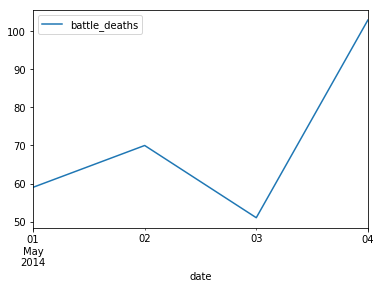

In [171]:
df.resample('D').sum().plot()

## I/O in Pandas
reaa_csv/ read_excel/read_hdf/read_sql/read_json/read_html  
to_csv/to_excel/to_hdf/to_sql/to_json/to_html